<a href="https://colab.research.google.com/github/FERNANDOBUCHELLY/S-S-/blob/main/Taller_Serie_Transformada_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNIVERSIDAD NACIONAL DE COLOMBIA**

**Ejercicios Serie y Tansoformada de Fourier**

LUIS FERNANDO CASTRO BUCHELLY

cc.1122786100

Ejercicio 2.1

Diferencias:

Serie de Fourier:

1. Solo se aplica para funciones periodicas
2. Es una suma de senos y cosenos o exponenetes complejos dependiendo del tipo de serie
3. La frecuencia es discreta y se relaciona con el periodo de la señal
4. Los pesos son obtenidos a travez de sumas
5. Reconstruye una señal periodica a partir de componentes discretas.

Transformada de Fourier:

1. Se puede aplicar para funciones no periodicas.
2. Es unba integralo de exponenciales complejos
3. Las frecuencias son continuas
4. deswcribe la amplitud en cada frecuencia angular (w)
5. Permite pasar del dominio en el tiempo a el dominio en frecuencia.

Semejanzas:

1. Permiten descomponer una señal en una combinacion de senos, cosenos y exponenciales complejos para analizar las frecuencias
2. Utilizan exponenciales complejos
3. Son lineales.





# **Distorsión Total de Armónicos (THD) y Factor de Potencia**

## **1. Distorsión Total de Armónicos (THD)**
El **THD (Total Harmonic Distortion)** es una medida que indica el nivel de distorsión en una señal debido a la presencia de armónicos. Se define como la relación entre la suma de las potencias de los armónicos y la potencia de la frecuencia fundamental:

\[
THD = \frac{\sqrt{V_2^2 + V_3^2 + V_4^2 + \dots}}{V_1}
\]

donde:
- \( V_1 \) es la amplitud de la frecuencia fundamental.
- \( V_n \) son las amplitudes de los armónicos de orden \( n \).

Mientras menor sea el THD, más "pura" es la señal. Un THD alto indica mayor contenido armónico y, por lo tanto, una mayor distorsión.

## **2. Factor de Potencia**
El **factor de potencia (FP)** mide la eficiencia con la que la potencia es utilizada en un circuito eléctrico. Se define como:

\[
FP = \cos(\theta) \cdot \frac{1}{\sqrt{1 + THD^2}}
\]

donde:
- \( \cos(\theta) \) es el **factor de desplazamiento** debido al desfase entre tensión y corriente.
- El término \( \frac{1}{\sqrt{1 + THD^2}} \) es el **factor de distorsión**, que reduce el FP cuando hay contenido armónico.

## **3. Cálculo del THD a partir de la FFT**
La **Transformada Rápida de Fourier (FFT)** permite obtener los coeficientes espectrales de una señal y, con esto, calcular el THD. Se sigue este procedimiento:

1. Se obtiene la señal de voltaje o corriente en el dominio del tiempo.
2. Se aplica la **FFT** para obtener su espectro de frecuencia.
3. Se identifica la amplitud de la frecuencia fundamental \( V_1 \) y de los armónicos \( V_n \).
4. Se aplica la ecuación del **THD**.

## **4. Relación entre THD y Factor de Potencia**
El factor de potencia tiene dos componentes:

1. **Factor de desplazamiento:** Depende del desfase entre el voltaje y la corriente (idealmente 1 si están en fase).
2. **Factor de distorsión:** Depende de la presencia de armónicos en la señal.

El **THD aumenta cuando hay más armónicos**, lo que reduce el **factor de distorsión** y, por lo tanto, disminuye el **factor de potencia** total del sistema.

## **5. Ejemplo ilustrativo del cálculo del THD y factor de potencia**
Para ilustrarlo, simularemos una señal con una componente fundamental y armónicos de diferentes amplitudes. Luego, calcularemos el THD y su impacto en el FP.



    **Cálculo del THD y Factor de Distorsión**

    
    $$ THD = \frac{\sqrt{V_2^2 + V_3^2 + V_4^2 + \dots}}{V_1} $$
    
    $$ Factor\ de\ Distorsión = \frac{1}{\sqrt{1 + THD^2}} $$
    
    Donde:
    - \( V_1 \) es la amplitud de la frecuencia fundamental.
    - \( V_n \) son las amplitudes de los armónicos.
    - Un THD alto indica mayor distorsión en la señal.
    


**Resultados:**

- **THD:** 0.2291 (22.91%)
- **Factor de Distorsión:** 0.9747


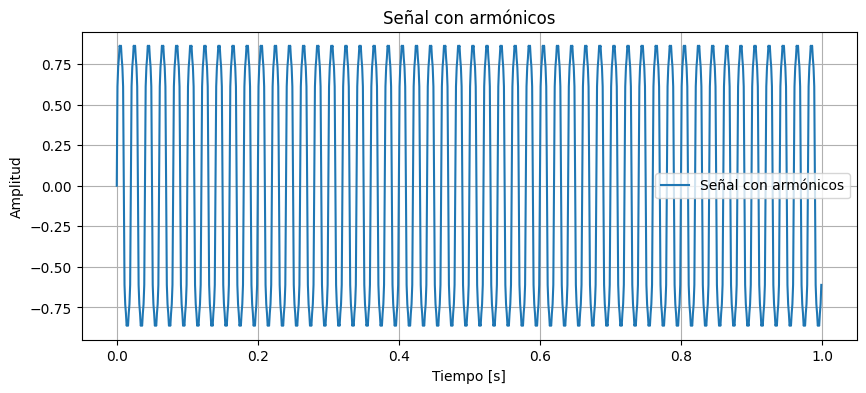

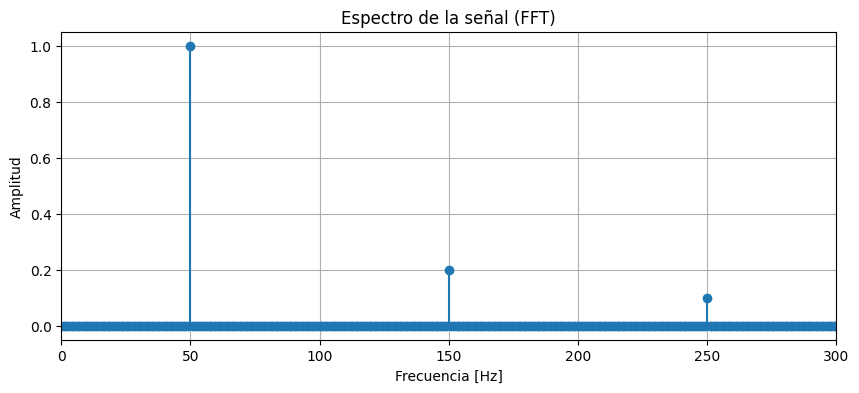

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from IPython.display import display, Markdown

# Definir función para mostrar fórmulas en Markdown
def show_formula():
    formula_text = r'''
    **Cálculo del THD y Factor de Distorsión**


    $$ THD = \frac{\sqrt{V_2^2 + V_3^2 + V_4^2 + \dots}}{V_1} $$

    $$ Factor\ de\ Distorsión = \frac{1}{\sqrt{1 + THD^2}} $$

    Donde:
    - \( V_1 \) es la amplitud de la frecuencia fundamental.
    - \( V_n \) son las amplitudes de los armónicos.
    - Un THD alto indica mayor distorsión en la señal.
    '''
    display(Markdown(formula_text))

# Mostrar fórmulas
show_formula()

# Parámetros de la señal
t = np.linspace(0, 1, 1000, endpoint=False)  # Tiempo
f1 = 50  # Frecuencia fundamental en Hz
harmonics = [(3, 0.2), (5, 0.1), (7, 0.05)]  # (orden, amplitud relativa)

# Generar la señal con armónicos
signal = np.sin(2 * np.pi * f1 * t)
for h, amp in harmonics:
    signal += amp * np.sin(2 * np.pi * f1 * h * t)

# Calcular la FFT
yf = fft(signal)
n = len(t)
freqs = np.fft.fftfreq(n, d=1/1000)[:n//2]
amplitudes = 2.0/n * np.abs(yf[:n//2])

# Identificar la amplitud fundamental y armónicos
V1 = amplitudes[np.argmax(freqs >= f1)]
Vn = np.sqrt(np.sum(amplitudes[freqs > f1]**2))
THD = Vn / V1
factor_distorsion = 1 / np.sqrt(1 + THD**2)

# Mostrar resultados en Markdown
result_text = f'''
**Resultados:**

- **THD:** {THD:.4f} ({THD*100:.2f}%)
- **Factor de Distorsión:** {factor_distorsion:.4f}
'''
display(Markdown(result_text))

# Graficar la señal en el tiempo
plt.figure(figsize=(10,4))
plt.plot(t, signal, label='Señal con armónicos')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal con armónicos')
plt.legend()
plt.grid()
plt.show()

# Graficar el espectro de frecuencias
plt.figure(figsize=(10,4))
plt.stem(freqs, amplitudes, basefmt=" ")
plt.xlim(0, 300)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.title('Espectro de la señal (FFT)')
plt.grid()
plt.show()


# Aplicación en comunicaciones - Modulación AM

**Consulte en qué consiste la modulación por amplitud para detección coherente y sus aplicaciones. Genere un ejemplo ilustrativo (en Python, por ejemplo) en el que se grafiquen las señales en el tiempo y en frecuencia (utilizando la función `rfft`) para:**
- Señal mensaje tipo pulso rectangular
- Señal mensaje tipo coseno

El usuario podrá definir el índice de modulación de interés.  
**Ver cuaderno Modulación AM** para más detalles.

---

## 1. Explicación teórica breve

### 1.1. Modulación AM (Amplitud Modulada)

La modulación en amplitud (AM) consiste en variar la amplitud de una portadora sinusoidal de alta frecuencia en proporción a la señal de mensaje (baja frecuencia). De manera general, una señal AM puede expresarse como:

\[
s(t) = A_c \bigl[1 + m \, x(t)\bigr]\cos(2\pi f_c t),
\]

donde:

- \( A_c \) es la amplitud de la portadora.  
- \( f_c \) es la frecuencia de la portadora.  
- \( x(t) \) es la señal de mensaje, normalizada para que su amplitud máxima sea 1 (típicamente \(-1 \le x(t) \le 1\)).  
- \( m \) es el **índice de modulación**.  

Cuando \( m \le 1 \), hablamos de **modulación submodulada** (no hay sobre-modulación).  
Si \( m > 1 \), se produce **sobre-modulación**, lo cual genera distorsión en la envolvente.

### 1.2. Detección coherente de AM

La **detección coherente** de AM implica multiplicar la señal recibida \( s(t) \) por una señal portadora de la misma frecuencia y fase (idealmente) que la portadora original, y luego aplicar un filtro paso bajo para extraer la componente de baja frecuencia (la señal de mensaje). El proceso puede describirse como:

1. Multiplicación: \( s(t) \times \cos(2\pi f_c t) \).  
2. Filtrado pasa-bajos para extraer \( x(t) \).

En la práctica, se requiere que el oscilador local esté sincronizado en frecuencia y fase con la portadora original. Luego de la multiplicación, la señal resultante contiene una componente en baja frecuencia (la señal moduladora) y otra en alta frecuencia, que se elimina con el filtro paso bajo.

### 1.3. Aplicaciones de la modulación AM

La modulación AM se utiliza en:
- Radiodifusión en bandas de AM (530 kHz – 1710 kHz aproximadamente).  
- Sistemas de comunicaciones analógicas simples.  
- Transmisión de voz y audio de baja calidad (aunque hoy en día se usan más modulaciones digitales, AM sigue presente en ciertas bandas de radio).  
- Laboratorios y entornos educativos para ilustrar conceptos básicos de modulación.

---

## 2. Ejemplo en Python

A modo de ejemplo, puede implementarse un código (no incluido aquí) que:

1. Genere una señal de mensaje tipo **pulso rectangular** y otra tipo **coseno**.  
2. Permita definir el **índice de modulación** \( m \).  
3. Grafique las señales en el **dominio del tiempo**.  
4. Calcule la **transformada de Fourier** (usando `rfft` de NumPy) para mostrar el **espectro** de la señal de mensaje y de la señal modulada en el **dominio de la frecuencia**.  
5. Aplique la **detección coherente** multiplicando la señal AM por la portadora y usando un filtro pasa-bajos para recuperar la señal de mensaje.  
6. Muestre la comparación entre la señal original y la señal recuperada.

**Parámetros sugeridos:**
- Frecuencia de muestreo fs = 5000 Hz.  
- Frecuencia de la portadora fc = 500 Hz.  
- Frecuencia de la señal de mensaje fm = 50 Hz.  
- Índice de modulación m = 0.8.  
- Duración de la simulación t_max = 0.01 s.  

**Pasos principales del código (de forma conceptual):**

1. **Generar el vector de tiempo** t usando np.arange(0, t_max, 1/fs).  
2. **Definir la señal de mensaje**:
   - **Pulso rectangular


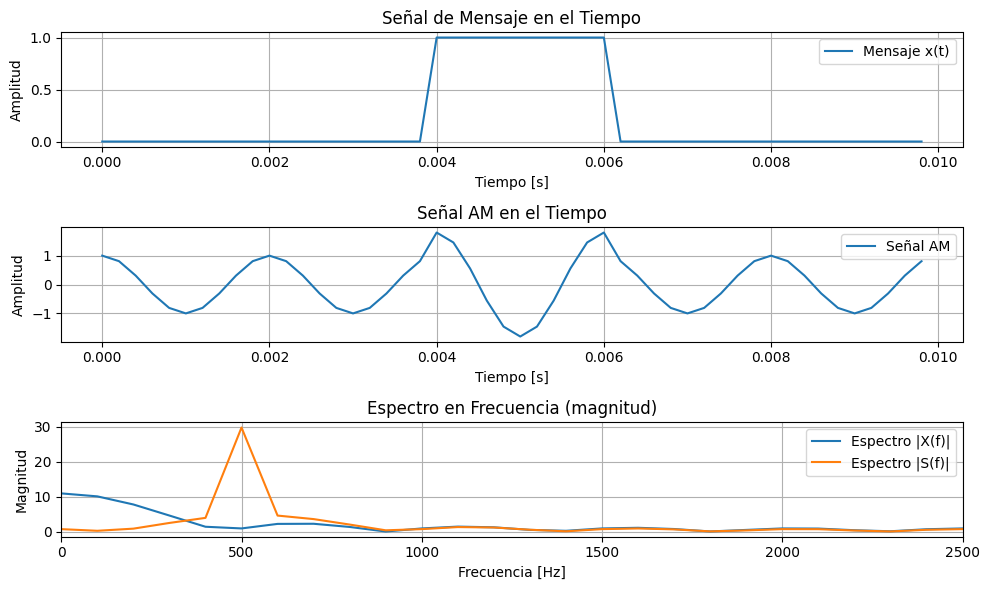

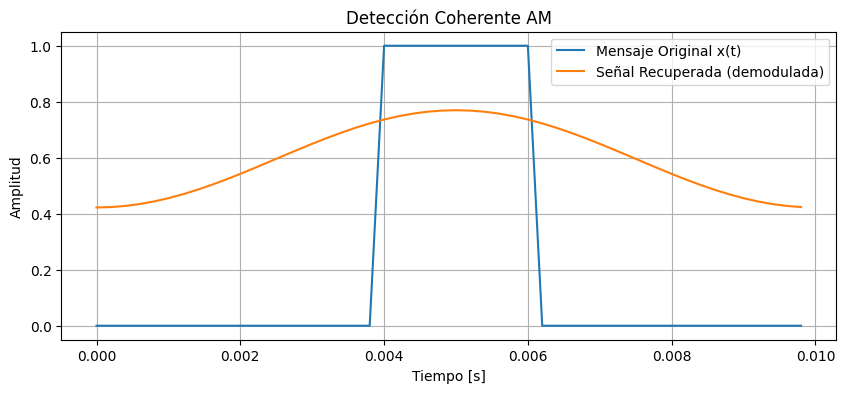

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros generales
fs = 5000.0   # Frecuencia de muestreo (Hz)
t_max = 0.01  # Duración de la simulación (segundos)
t = np.arange(0, t_max, 1/fs)

# Parámetros de la portadora y mensaje
fc = 500.0    # Frecuencia de la portadora (Hz)
fm = 50.0     # Frecuencia de la señal de mensaje (para el caso coseno) (Hz)
m = 0.8       # Índice de modulación

# Elección del tipo de mensaje: 'pulso' o 'coseno'
tipo_mensaje = 'pulso'  # Cambiar a 'coseno' para probar la otra señal

# Generación de la señal de mensaje x(t)
if tipo_mensaje == 'pulso':
    # Pulso rectangular centrado aproximadamente en la mitad de t
    # Ejemplo: un pulso de duración 2 ms en medio de la ventana
    dur_pulso = 0.002  # duración del pulso (2 ms)
    start_pulso = (t_max - dur_pulso)/2
    end_pulso = (t_max + dur_pulso)/2
    x = np.where((t >= start_pulso) & (t <= end_pulso), 1.0, 0.0)

elif tipo_mensaje == 'coseno':
    x = np.cos(2 * np.pi * fm * t)

else:
    raise ValueError("Tipo de mensaje no reconocido. Use 'pulso' o 'coseno'.")

# Normalizar la señal de mensaje a [-1, 1] (opcional si se desea)
# En el caso de pulso 0-1, se puede dejar así o escalar a -1 y 1.
# Para el pulso, simplemente dejemos 0 y 1, ajustando la fórmula de AM.

# Señal modulada en amplitud
# s(t) = Ac [1 + m*x(t)] cos(2π fc t)
# Para simplificar, usemos Ac = 1
Ac = 1.0
s = Ac * (1 + m * x) * np.cos(2 * np.pi * fc * t)

# --- Graficar en el dominio del tiempo ---
plt.figure(figsize=(10,6))

plt.subplot(3,1,1)
plt.plot(t, x, label='Mensaje x(t)')
plt.title('Señal de Mensaje en el Tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.subplot(3,1,2)
plt.plot(t, s, label='Señal AM')
plt.title('Señal AM en el Tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# --- Transformada de Fourier (rfft) ---
# Calculamos el espectro de la señal de mensaje y de la señal modulada
X = np.fft.rfft(x)
S = np.fft.rfft(s)

# Frecuencias asociadas a rfft
freqs = np.fft.rfftfreq(len(t), 1/fs)

# Magnitudes
X_magnitude = np.abs(X)
S_magnitude = np.abs(S)

plt.subplot(3,1,3)
plt.plot(freqs, X_magnitude, label='Espectro |X(f)|')
plt.plot(freqs, S_magnitude, label='Espectro |S(f)|')
plt.title('Espectro en Frecuencia (magnitud)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.xlim([0, fs/2])  # rfft llega hasta la mitad de fs
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# --- Detección coherente ---
# Paso 1: Multiplicación por la portadora
s_demod = s * np.cos(2 * np.pi * fc * t)

# Paso 2: Filtrado pasa-bajos para extraer la señal base
# Aquí haremos un filtrado sencillo usando transformada de Fourier y enmascarado.
S_demod = np.fft.rfft(s_demod)
# Definir la frecuencia de corte (ej: 2*fm para conservar banda base)
f_corte = 2 * fm

# Construir un filtro ideal (rectangular) en frecuencia
H = np.zeros_like(S_demod)
for i, f in enumerate(freqs):
    if f <= f_corte:
        H[i] = 1.0

# Aplicar el filtro
S_demod_filtrado = S_demod * H
s_demod_filtrado = np.fft.irfft(S_demod_filtrado)

# Graficar la señal detectada
plt.figure(figsize=(10,4))
plt.plot(t, x, label='Mensaje Original x(t)')
plt.plot(t, s_demod_filtrado, label='Señal Recuperada (demodulada)')
plt.title('Detección Coherente AM')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()
